In [1]:
import pandas as pd
import gpu_tracking as gt
from gpu_tracking import app
import tifffile
import numpy as np
data = tifffile.imread("0 (1).tif").astype("float32")
import matplotlib.pyplot as plt
vid1 = data[:, 0, :, :].copy()
vid2 = data[:, 1, :, :].copy()

In [2]:
gt.load("simtests/simulated_i_int_1500_sig_noise_40_.tif").std()

40.35016

In [42]:
import gpu_tracking as gt
import numpy as np
pred = gt.batch("simtests/simulated_i_int_1500_sig_noise_40_.tif", 9, snr = 1)
labels = gt.load("simtests/simulated_i_int_1500_sig_noise_40_labels.tif")

where = np.where(labels)
true = pd.DataFrame({"frame": where[0], "y": where[1], "x": where[2]})

pred, true = gt.connect(pred, true, search_range = 1)

In [46]:
pred.merge(true, on = "particle", how = "outer")

,frame_x,y_x,x_x,mass,particle,frame_y,y_y,x_y
0,0.0,195.827469,258.624115,852.824463,0,0.0,196.0,259.0
1,0.0,473.651184,227.309982,420.820862,1,NaN,NaN,NaN
2,0.0,119.904465,302.827698,790.632263,2,0.0,120.0,303.0
3,0.0,295.848297,275.162445,645.629150,3,0.0,296.0,275.0
4,0.0,267.751251,251.108887,841.427795,4,0.0,268.0,251.0
...,...,...,...,...,...,...,...,...
3080,NaN,NaN,NaN,NaN,3024,48.0,285.0,281.0
3081,NaN,NaN,NaN,NaN,3081,49.0,195.0,195.0
3082,NaN,NaN,NaN,NaN,3082,49.0,195.0,199.0
3083,NaN,NaN,NaN,NaN,3083,49.0,283.0,284.0


In [44]:
true

,frame,y,x,particle
0,0,51,381,10
1,0,53,105,43
2,0,58,273,6
3,0,65,378,15
4,0,87,250,56
...,...,...,...,...
2495,49,432,144,3065
2496,49,435,176,3070
2497,49,439,70,3053
2498,49,447,54,3054


In [40]:
idk1

,frame,y,x,mass,particle
0,0,58.189766,273.018982,965.561707,0
1,0,430.214539,208.065735,842.921326,1
2,0,284.039093,282.271088,1115.641113,2
3,0,243.259109,306.010101,392.535400,3
4,0,267.751251,251.108887,841.427795,4
...,...,...,...,...,...
2887,49,284.110107,193.969223,872.005737,3076
2888,49,58.073357,272.923370,881.394775,3077
2889,49,267.958405,250.655991,994.393005,3078
2890,49,284.083618,282.655853,1142.370972,3079


In [41]:
idk2

,frame,y,x,particle
0,0,51,381,20
1,0,53,105,38
2,0,58,273,0
3,0,65,378,19
4,0,87,250,5
...,...,...,...,...
2495,49,432,144,3066
2496,49,435,176,3063
2497,49,439,70,3049
2498,49,447,54,3054


In [3]:
labels1 = gt.load("simtests\simulated_i_int_1000_sig_noise_50_labels.tif", keys = [50])
labels1.shape

ValueError: Requested a frame outside the length
 of the video. Video length is 50, requested frame 50

In [12]:
np.where(labels1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=int64),
 array([ 55,  66,  89, 102, 120, 123, 137, 138, 140, 148, 158, 162, 162,
        162, 171, 185, 190, 197, 205, 207, 207, 217, 238, 247, 269, 276,
        281, 285, 286, 286, 291, 297, 303, 304, 315, 322, 336, 338, 376,
        383, 387, 388, 392, 396, 409, 411, 427, 434, 443, 444], dtype=int64),
 array([328, 421, 294, 171, 232, 374, 172, 266, 118,  79, 255, 299, 369,
        429, 333, 176, 218, 365, 432,  58, 321, 428, 178,  76, 329, 308,
        429, 448,  99, 399, 289, 337, 368, 372, 417, 256, 337, 301, 407,
        401,  60, 148, 230, 441, 305, 438, 403, 134, 412, 182], dtype=int64))

In [11]:
noise = np.random.poisson(50, (100, 100))

In [ ]:
list(1)

In [12]:
noise

array([[60, 46, 46, ..., 57, 49, 38],
       [47, 54, 55, ..., 48, 51, 54],
       [53, 63, 56, ..., 59, 56, 49],
       ...,
       [51, 43, 48, ..., 55, 62, 40],
       [37, 49, 47, ..., 55, 55, 45],
       [53, 46, 52, ..., 43, 38, 50]])

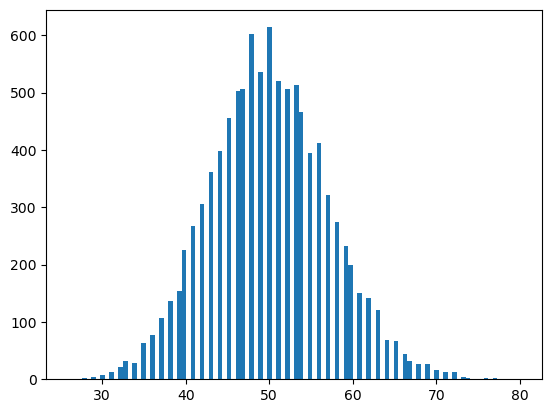

In [10]:
plt.hist(np.random.poisson(50, (100, 100)).flat, bins = 100)
pass

In [2]:
vid = vid2
df = gt.LoG(vid, min_r = 3, max_r = 25, snr = 1.5, log_spacing = True, overlap_threshold = 0, characterize = True)
# gt.annotate_video(vid, df, frame = 0)
df2 = gt.characterize_points(vid, df, diameter = 2 * int(25+0.5) + 1)
df2

,frame,y,x,mass,r,Rg,raw,signal,ecc
0,0,150.900909,113.553787,94654.320312,19.752718,12.796684,167278.0,140.225449,0.040020
1,0,70.762619,75.113480,78555.218750,15.606794,10.717308,124717.0,160.453812,0.062240
2,0,196.306656,44.883999,58819.445312,12.331064,8.394627,79638.0,184.529907,0.126315
3,0,125.106720,216.895538,51358.632812,12.331064,8.263371,68499.0,171.352646,0.062988
4,0,53.858601,141.998978,33485.925781,9.742880,6.222962,39969.0,178.701492,0.017742
...,...,...,...,...,...,...,...,...,...
220,35,66.577240,70.263496,96356.671875,19.752718,12.948821,170923.0,158.147964,0.090669
221,35,152.944458,104.716469,82399.078125,15.606794,10.428537,125534.0,181.456070,0.029373
222,35,197.123032,35.999863,76473.820312,15.606794,10.364677,117908.0,162.252731,0.101294
223,35,127.021500,224.238037,60351.667969,12.331064,8.355248,79843.0,182.814240,0.040067


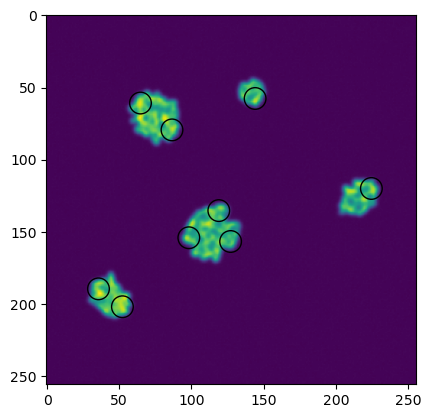

In [30]:
vid = vid2
d = 15
df = gt.batch(vid, d, snr = 1.5, characterize = True)
gt.annotate_video(vid, df, r = d/2)
df2 = gt.characterize_points(vid, df, diameter = d)

In [31]:
df

,frame,y,x,mass,Rg,raw,signal,ecc
0,0,189.391693,35.605385,5021.738281,4.212654,23104.0,87.889374,0.341188
1,0,60.702179,64.683365,4830.131348,4.112053,23036.0,84.633865,0.331965
2,0,201.803329,52.197571,5796.663086,4.373097,25453.0,88.495216,0.244228
3,0,154.015320,98.182121,3509.542480,3.502739,17060.0,101.797272,0.166678
4,0,135.193710,118.952141,4631.745605,4.099351,19315.0,95.801582,0.315554
...,...,...,...,...,...,...,...,...
351,35,56.254841,58.867180,4870.939453,3.671341,21479.0,97.097778,0.270266
352,35,148.310471,115.024338,4135.115723,4.215629,22749.0,80.757172,0.136749
353,35,71.872856,140.043854,6995.666504,4.537791,22515.0,94.990814,0.110039
354,35,136.650604,220.877975,4164.271973,3.972718,19421.0,89.307129,0.316086


In [32]:
df

,frame,y,x,mass,Rg,raw,signal,ecc
0,0,189.391693,35.605385,5021.738281,4.212654,23104.0,87.889374,0.341188
1,0,60.702179,64.683365,4830.131348,4.112053,23036.0,84.633865,0.331965
2,0,201.803329,52.197571,5796.663086,4.373097,25453.0,88.495216,0.244228
3,0,154.015320,98.182121,3509.542480,3.502739,17060.0,101.797272,0.166678
4,0,135.193710,118.952141,4631.745605,4.099351,19315.0,95.801582,0.315554
...,...,...,...,...,...,...,...,...
351,35,56.254841,58.867180,4870.939453,3.671341,21479.0,97.097778,0.270266
352,35,148.310471,115.024338,4135.115723,4.215629,22749.0,80.757172,0.136749
353,35,71.872856,140.043854,6995.666504,4.537791,22515.0,94.990814,0.110039
354,35,136.650604,220.877975,4164.271973,3.972718,19421.0,89.307129,0.316086


In [33]:
((df - df2) != 0)["mass"].sum()

0

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

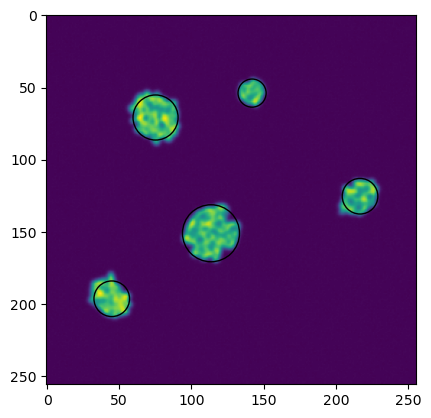

In [4]:
df

,frame,y,x,mass,r,Rg,raw,signal,ecc
0,0,150.902313,113.545654,94654.320312,19.752718,12.796684,167278.0,140.225449,0.040020
1,0,70.721771,75.143639,78555.218750,15.606794,10.717308,124717.0,160.453812,0.062240
2,0,196.268677,44.807465,58819.445312,12.331064,8.394627,79638.0,184.529907,0.126315
3,0,125.241486,216.774567,51358.632812,12.331064,8.263371,68499.0,171.352646,0.062988
4,0,53.819569,142.000198,33485.925781,9.742880,6.222962,39969.0,178.701492,0.017742
...,...,...,...,...,...,...,...,...,...
218,35,66.553795,70.270096,96356.671875,19.752718,12.948821,170923.0,158.147964,0.090669
219,35,152.917297,104.640511,82399.078125,15.606794,10.428537,125534.0,181.456070,0.029373
220,35,197.143219,36.110096,76473.820312,15.606794,10.364677,117908.0,162.252731,0.101294
221,35,127.134911,224.252182,60351.667969,12.331064,8.355248,79843.0,182.814240,0.040067


,frame,y,x,mass,r,Rg,raw,signal,ecc
0,0,150.902313,113.545654,94654.320312,19.752718,12.796684,167278.0,140.225449,0.040020
1,0,70.721771,75.143639,78555.218750,15.606794,10.717308,124717.0,160.453812,0.062240
2,0,196.268677,44.807465,58819.445312,12.331064,8.394627,79638.0,184.529907,0.126315
3,0,125.241486,216.774567,51358.632812,12.331064,8.263371,68499.0,171.352646,0.062988
4,0,53.819569,142.000198,33485.925781,9.742880,6.222962,39969.0,178.701492,0.017742
...,...,...,...,...,...,...,...,...,...
218,35,66.553795,70.270096,96356.671875,19.752718,12.948821,170923.0,158.147964,0.090669
219,35,152.917297,104.640511,82399.078125,15.606794,10.428537,125534.0,181.456070,0.029373
220,35,197.143219,36.110096,76473.820312,15.606794,10.364677,117908.0,162.252731,0.101294
221,35,127.134911,224.252182,60351.667969,12.331064,8.355248,79843.0,182.814240,0.040067


In [22]:
len(vid2)

36

In [ ]:
df = gt.LoG(r"C:\Users\andre\Documents\tracking_optimizations\gpu-tracking\testing\easy_test_data.tif",
min_r = 2.2, max_r = 3.5, snr = 1.5, log_spacing = True, overlap_threshold = 0.0, search_range = 9)


TypeError: argument 'points_to_characterize': type mismatch:
 from=float64, to=float32

In [17]:
df[(df["x"] > 200) & (df["x"] < 220) & (df["y"] > 125) & (df["y"] < 150) & (df["frame"] == 0)]

,frame,y,x,mass,r,particle
12,0,134.689072,218.863510,2788.271484,3.000000,12
30,0,132.784637,207.493317,8241.832031,4.805601,30
34,0,125.241486,216.774567,53471.546875,12.331064,34


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

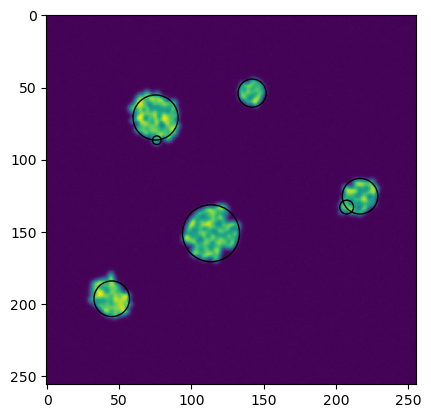

In [9]:
vid = vid2
df = gt.LoG(vid, min_r = 3, max_r = 25, snr = 1.5, log_spacing = True, overlap_threshold = 0.51)
gt.annotate_video(vid, df, frame = 0)

In [6]:
(df["frame"] == 0).sum()

12

In [7]:
df

,frame,y,x,mass,r
0,0,151.038345,113.420265,93733.210938,19.752718
1,0,70.718475,75.155838,81012.484375,15.606794
2,0,196.310760,44.804173,62017.949219,12.331064
3,0,125.224213,216.785538,53503.023438,12.331064
4,0,53.813717,142.030930,33987.574219,9.742880
...,...,...,...,...,...
525,35,109.998802,34.037457,3465.532959,3.796946
526,35,142.044388,49.034939,3388.556152,3.796946
527,35,219.978897,201.985443,3335.425049,3.796946
528,35,184.236511,24.564325,1744.156128,3.000000
